# XGBoost

**Data Preparation**

In [21]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/bill_authentication(XGBoost).csv')

In [22]:
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


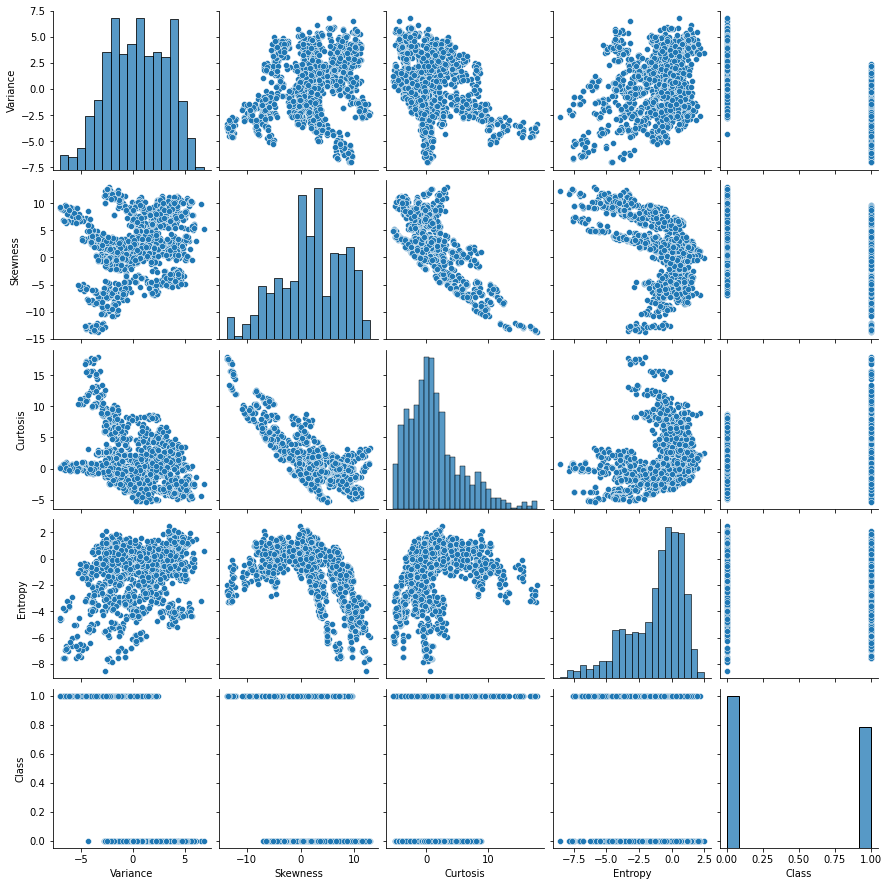

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[:-1]], data['Class'], test_size = 0.2)

**Building XGBoost Classification Model**

In [25]:
from xgboost import XGBClassifier

# Inicialize XGBoost
model = XGBClassifier(max_depth = 50, min_child_weight = 1, n_estimators = 200, n_jobs = -1, verbose = 1, learning_rate = 0.16)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

# Make prediction
y_pred = model.predict(X_test)

**Evaluating Model**

In [26]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9927272727272727


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[149   0]
 [  2 124]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       149
           1       1.00      0.98      0.99       126

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Regression

**Data Preparation**

In [28]:
data = pd.read_csv('/content/drive/MyDrive/trainExercise7.csv')

In [29]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [30]:
data.dropna(axis = 0, subset=['SalePrice'], inplace = True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis = 1).select_dtypes(exclude = ['object'])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

**Building XGBoost Regression Model**

In [34]:
from xgboost import XGBRegressor

model = XGBRegressor(objective = 'reg:linear',
                     colsample_bytree = 0.3, learning_rate = 0.1,
                     max_depth = 5, alpha = 2, n_estimators = 10)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

# Make Predictions
y_pred = model.predict(X_test)

[16:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Evaluating Model**

In [35]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error: " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error: 255.93171803394122


**k-Fold Cross Validation using XGBoost**

In [37]:
from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data = X, label = y)

params = {"objective":"reg:linear", 'colsample_bytree':0.3, 'learning_rate':0.1,
          'max_depth':5, 'alpha': 10}

cv_results = cv(dtrain = data_dmatrix, params = params, nfold = 3,
                num_boost_round = 50, early_stopping_rounds = 10, metrics = "rmse", as_pandas = True, seed = 123)

[16:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,179033.968750,650.675751,179071.536458,1558.739525
1,162358.500000,623.335527,162872.739583,1440.274536
2,147449.661458,717.930424,148259.156250,812.789874
3,133987.661458,590.026949,135161.968750,730.897987
4,121795.273437,463.116471,123460.062500,766.995133


In [39]:
print((cv_results["test-rmse-mean"]).tail(1))

49    30368.595703
Name: test-rmse-mean, dtype: float64


**Visualize Boosting Trees and Feature Importance**

In [40]:
from xgboost import train

xg_reg = train(params = params, dtrain = data_dmatrix, num_boost_round = 10)

[16:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


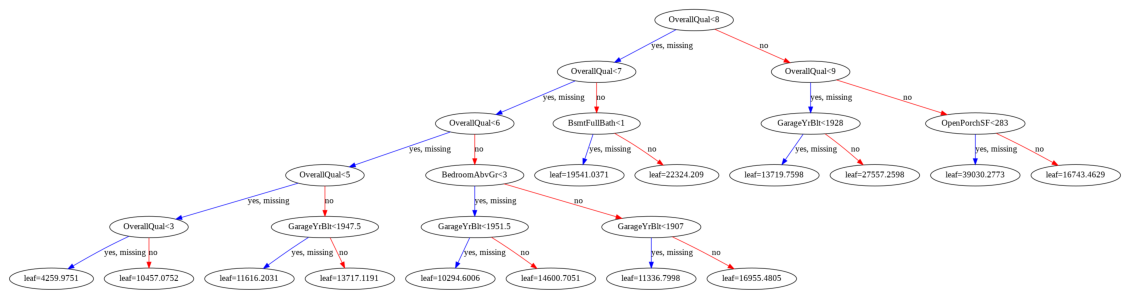

In [43]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xg_reg, num_trees = 0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

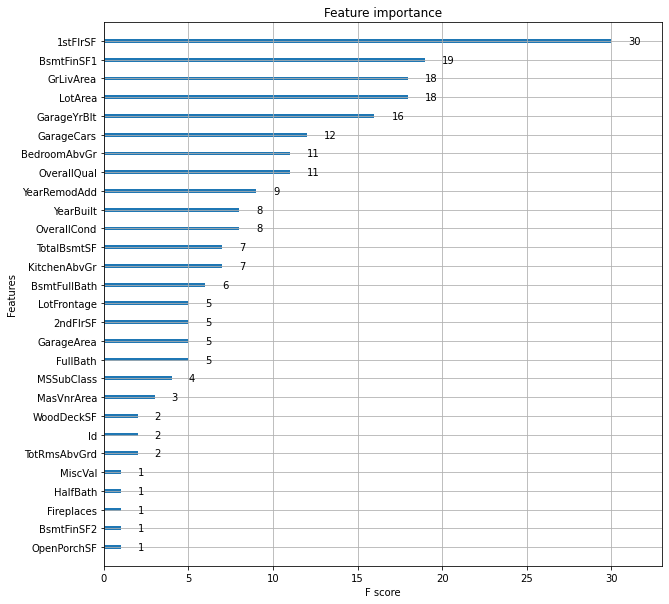

In [45]:
from xgboost import plot_importance

plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# LGBM

> Classification

**Data Preparation**

In [46]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/bill_authentication(XGBoost).csv')

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[:-1]], data['Class'], test_size = 0.2)

**Building LGBM Classification Model**

In [50]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

**Evaluating Model**

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[161   0]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       114

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



> Regression

**Data Preparation**

In [59]:
data = pd.read_csv('/content/drive/MyDrive/trainHousePrices.csv')

In [61]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [64]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

**Building LGBM Regression Model**

In [65]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 1000)

LGBM.fit(X_train, Y_train)

y_pred = LGBM.predict(X_test)

**Evaluating Model**

In [66]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error: " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error: 134.04251693007308


# CatBoost

> Classification

**Data Preparation**

In [67]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/bill_authentication(XGBoost).csv')

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[:-1]], data['Class'], test_size = 0.2)

**Building CatBoost Classification Model**

In [69]:
!pip install catboost

     |████████████████████████████████| 66.3MB 57kB/s 


In [71]:
from catboost import CatBoostClassifier
from random import seed

cb_model = CatBoostClassifier(loss_function='Logloss',
                              eval_metric = 'AUC',
                              verbose = 200,
                              random_seed = seed(1))

cb_model.fit(X_train, Y_train)

Learning rate set to 0.010718
0:	total: 50.6ms	remaining: 50.6s
200:	total: 449ms	remaining: 1.78s
400:	total: 862ms	remaining: 1.29s
600:	total: 1.25s	remaining: 831ms
800:	total: 1.66s	remaining: 412ms
999:	total: 2.04s	remaining: 0us


In [72]:
y_pred = cb_model.predict(X_test)

**Evaluating Model**

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[155   1]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       156
           1       0.99      1.00      1.00       119

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



> Regression

**Data Preparation**

In [74]:
data = pd.read_csv('/content/drive/MyDrive/trainHousePrices.csv')

In [76]:
data.dropna(axis = 0, subset=['SalePrice'], inplace = True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis = 1).select_dtypes(exclude = ['object'])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

**Building CatBoost Regression Model**

In [81]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(iterations = 500,
                             learning_rate = 0.05,
                             depth = 10,
                             eval_metric = 'RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type = 'Iter',
                             metric_period = 50,
                             od_wait = 20)

cb_model.fit(X_train, Y_train)

0:	learn: 74131.2244611	total: 99.1ms	remaining: 49.5s
50:	learn: 26181.0685987	total: 2.23s	remaining: 19.6s
100:	learn: 16798.6740458	total: 4.46s	remaining: 17.6s
150:	learn: 13082.0656561	total: 6.65s	remaining: 15.4s
200:	learn: 10940.2849368	total: 8.63s	remaining: 12.8s
250:	learn: 9095.1220853	total: 10.7s	remaining: 10.6s
300:	learn: 7499.2456167	total: 13s	remaining: 8.6s
350:	learn: 6069.9683771	total: 15.3s	remaining: 6.48s
400:	learn: 4985.1837510	total: 17.6s	remaining: 4.34s
450:	learn: 4134.2618433	total: 19.9s	remaining: 2.16s
499:	learn: 3456.3249657	total: 22.2s	remaining: 0us


In [82]:
y_pred = cb_model.predict(X_test)

**Evaluating Model**

In [83]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error: " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error: 136.85668686433357


# Naive Bayes Classification

**Data Preparation**

In [84]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/bill_authentication(XGBoost).csv')

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

**Building Classification Model**

In [92]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

# Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild

**Evaluating Model**

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[133  19]
 [ 16 107]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       152
           1       0.85      0.87      0.86       123

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275

